In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download("punkt")

sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural"
tokens = word_tokenize(sentence)
print(tokens)

['NLTK', 'es', 'una', 'biblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
words = ["running", "plays", "jumped"]
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words]
print(stems)

['run', 'play', 'jump']


In [3]:
nltk.download("averaged_perceptron_tagger")
from operator import pos
from nltk import pos_tag

sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural"
tokens = word_tokenize(sentence)
tagged_words = pos_tag(tokens)
print(tagged_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('de', 'IN'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ')]


In [4]:
import random

#Ejemplo de un conjunto de datos de textos etiquetados
data = [
("I love this movie", "positive"),
("This movie is terrible", "negative"),
("This movie is great", "positive"),
("I dislike this movie", "negative"),
("This film is amazing", "positive"),
("I can't stand watching this movie", "negative"),
("The acting in this movie is phenomenal", "positive"),
("I regret wasting my time on this film", "negative"),
("I thoroughly enjoyed this movie", "positive"),
("This movie lacks depth and substance", "negative"),
("The plot of this movie was captivating", "positive"),
("I found the characters in this film to be very engaging", "positive"),
("The special effects in this movie were impressive", "positive"),
("The storyline was predictable and unoriginal", "negative"),
("I was disappointed by the lack of character development", "negative"),
("The cinematography in this film was stunning", "positive"),
("The dialogue felt forced and unnatural", "negative"),
("The pacing of the movie was too slow for my liking", "negative"),
("I was pleasantly surprised by how much I enjoyed this film", "positive"),
("The ending left me feeling unsatisfied and confused", "negative"),
("This movie exceeded my expectations", "positive"),
("The performances by the actors were lackluster", "negative")
]

In [5]:
# Preprocesamiento de datos: tokenización y extracción de características
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    return {word: True for word in tokens}

In [6]:
# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess(text), label) for (text, label) in data]

In [7]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
train_set, test_set = featuresets[16:], featuresets[16:]

In [8]:
# Entrenamos un clasificador utilizando Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [9]:
# Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [10]:
# Clasificamos un nuevo texto
new_text = "This movie is amazing"
new_features = preprocess(new_text)
predicted_label = classifier.classify(new_features)
print("Prediction:", predicted_label)

Prediction: positive


In [11]:
import pandas as pd

data2 = pd.read_csv("peliculas.csv")
print(data2.head())

                                                text  tag
0  films adapted from comic books have had plenty...  pos
1  for starters , it was created by alan moore ( ...  pos
2  to say moore and campbell thoroughly researche...  pos
3  the book ( or " graphic novel , " if you will ...  pos
4  in other words , don't dismiss this film becau...  pos


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Función para preprocesar el texto
def preprocess(text):

    tokens = word_tokenize(text)

    # Convertir a minúsculas
    tokens = [word.lower() for word in tokens]

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return tokens

In [14]:
# Aplicar la función de preprocesamiento a la columna de texto
data2['processed_text'] = data2['text'].apply(preprocess)

print(data2.head())

                                                text  tag  \
0  films adapted from comic books have had plenty...  pos   
1  for starters , it was created by alan moore ( ...  pos   
2  to say moore and campbell thoroughly researche...  pos   
3  the book ( or " graphic novel , " if you will ...  pos   
4  in other words , don't dismiss this film becau...  pos   

                                      processed_text  
0  [films, adapted, comic, books, plenty, success...  
1  [starters, created, alan, moore, eddie, campbe...  
2  [say, moore, campbell, thoroughly, researched,...  
3  [book, graphic, novel, 500, pages, long, inclu...  
4                     [words, dismiss, film, source]  


In [15]:
from nltk.classify import apply_features

# Preprocesamiento de datos
def get_features(text):
    return {word: True for word in text}

datos = [(get_features(text), label) for text, label in zip(data2['processed_text'], data2['tag'])]

In [16]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(datos, test_size=0.2, random_state=42)

In [17]:
from nltk import NaiveBayesClassifier

# Entrenar el modelo
classifier2 = NaiveBayesClassifier.train(train_data)

In [18]:
# Evaluar el modelo
accuracy2 = nltk.classify.accuracy(classifier2, test_data)
print(f'Accuracy: {accuracy2 * 100:.2f}%')

Accuracy: 69.41%


In [19]:
# Mostrar las palabras más informativas
classifier2.show_most_informative_features(10)

Most Informative Features
                   mulan = True              pos : neg    =     49.2 : 1.0
                   flynt = True              pos : neg    =     35.7 : 1.0
                  seagal = True              neg : pos    =     35.6 : 1.0
                lebowski = True              pos : neg    =     27.3 : 1.0
                     8mm = True              neg : pos    =     23.9 : 1.0
               stupidity = True              neg : pos    =     21.1 : 1.0
                cauldron = True              pos : neg    =     20.9 : 1.0
                bulworth = True              pos : neg    =     19.1 : 1.0
              schumacher = True              neg : pos    =     18.9 : 1.0
                   magoo = True              neg : pos    =     17.6 : 1.0


In [20]:
# Clasificamos un nuevo texto
new_text = "This movie is amazing"
new_features = preprocess(new_text)
features_new_text = get_features(new_features)
predicted_label = classifier2.classify(features_new_text)
print("Prediction:", predicted_label)

Prediction: pos


In [21]:
data2['processed_text_joined'] = data2['processed_text'].apply(lambda x: ' '.join(x))

In [22]:
# Convertir textos a una matriz de características
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data2['processed_text_joined'])

In [23]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [24]:
# Convertir las etiquetas a un formato adecuado
y = data2['tag']

In [25]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Definir una lista de clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    #'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB()
}

In [27]:
# Entrenar y evaluar cada clasificador
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate(clf, name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_test_binary = (y_test == 'pos').astype(int)  # Assuming 'pos' is the positive label
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Uso de etiquetas binarias para la ROC AUC
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba) if y_pred_proba is not None else 'N/A'

    print(f'{name} Classifier:')
    print(f'  Accuracy: {accuracy * 100:.2f}%')
    print(f'  Precision: {precision * 100:.2f}%')
    print(f'  Recall: {recall * 100:.2f}%')
    print(f'  F1 Score: {f1 * 100:.2f}%')
    print(f'  Confusion Matrix:\n{conf_matrix}')
    print(f'  ROC AUC: {roc_auc}\n')

    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

        # Graficar la curva ROC
    if y_pred_proba is not None:
      # Uso de etiquetas binarias para la ROC AUC
      fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
      roc_auc = auc(fpr, tpr)

      plt.figure(figsize=(8, 6))
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f'{name} - Receiver Operating Characteristic')
      plt.legend(loc="lower right")
      plt.show()

Logistic Regression Classifier:
  Accuracy: 63.52%
  Precision: 63.55%
  Recall: 63.52%
  F1 Score: 63.52%
  Confusion Matrix:
[[4098 2273]
 [2449 4124]]
  ROC AUC: 0.6716194466009798



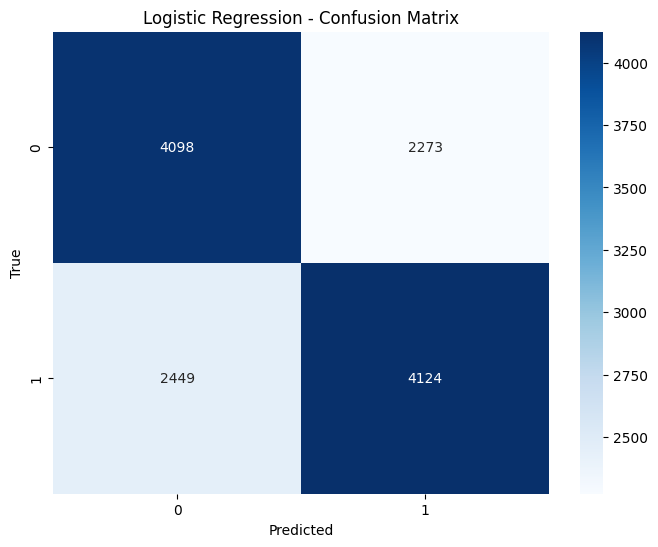

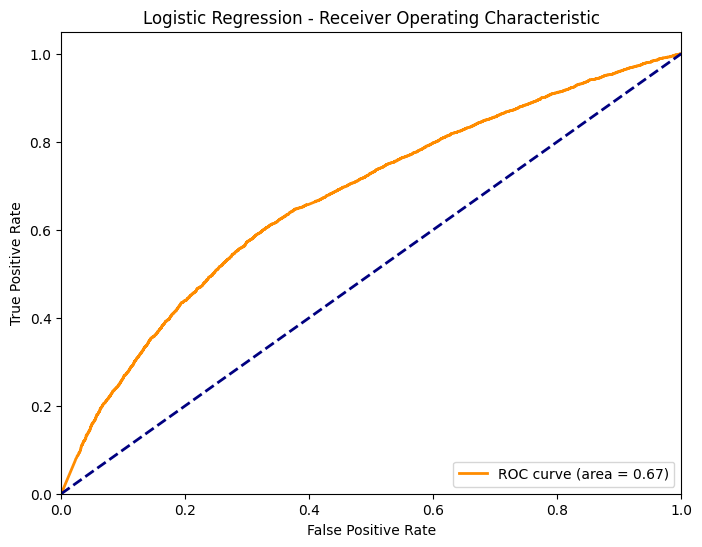

KNN Classifier:
  Accuracy: 58.96%
  Precision: 59.44%
  Recall: 58.96%
  F1 Score: 58.63%
  Confusion Matrix:
[[4344 2027]
 [3285 3288]]
  ROC AUC: 0.6211280299541153



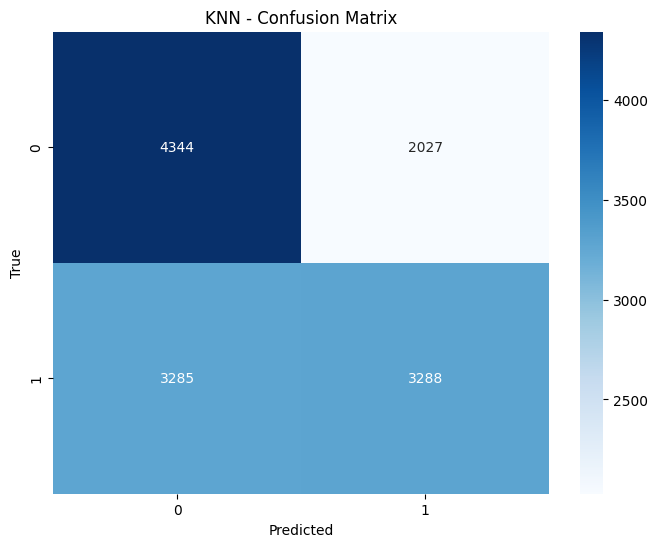

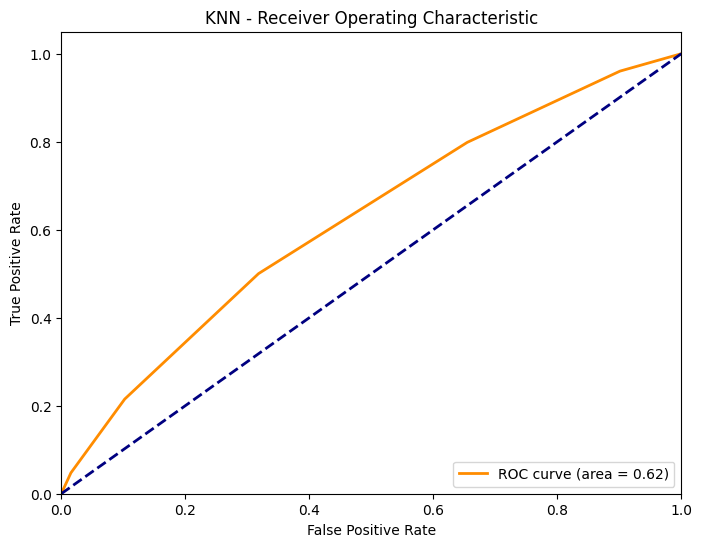

Random Forest Classifier:
  Accuracy: 64.73%
  Precision: 64.73%
  Recall: 64.73%
  F1 Score: 64.73%
  Confusion Matrix:
[[4091 2280]
 [2285 4288]]
  ROC AUC: 0.7014619960754678



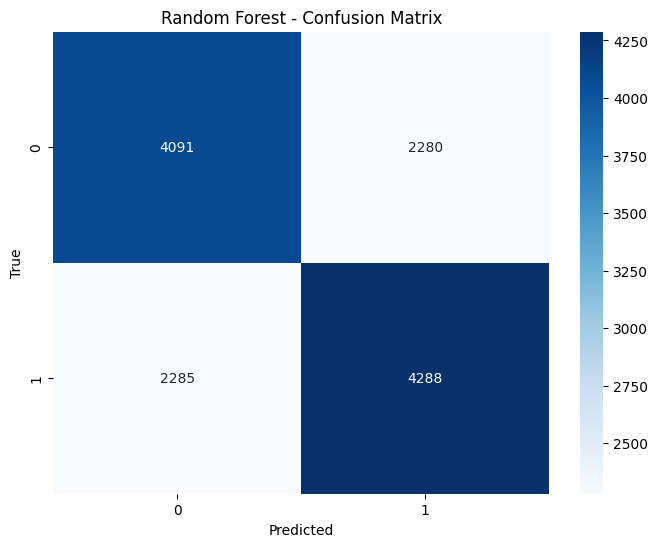

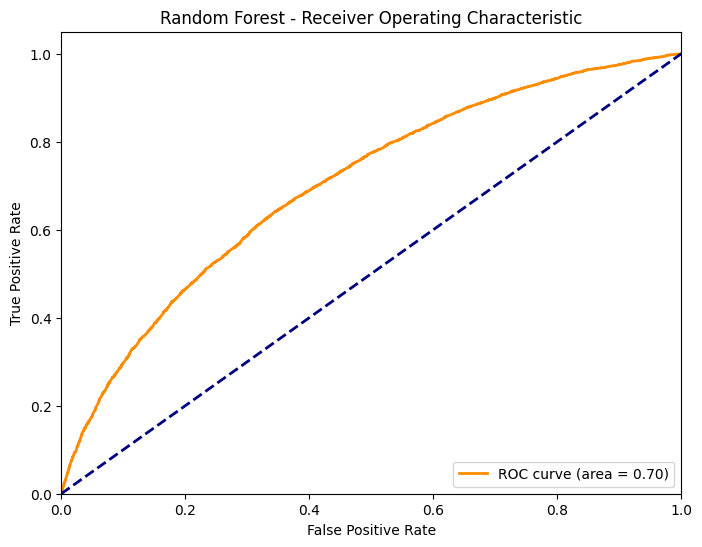

Gradient Boosting Classifier:
  Accuracy: 57.40%
  Precision: 61.45%
  Recall: 57.40%
  F1 Score: 52.61%
  Confusion Matrix:
[[1612 4759]
 [ 755 5818]]
  ROC AUC: 0.6265513115050482



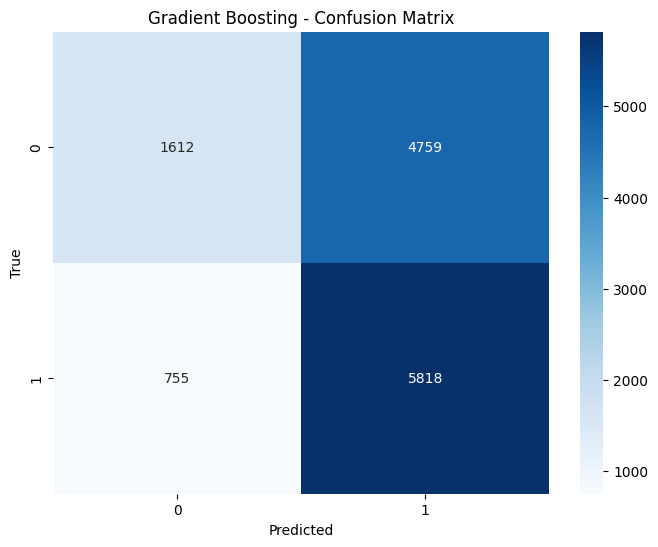

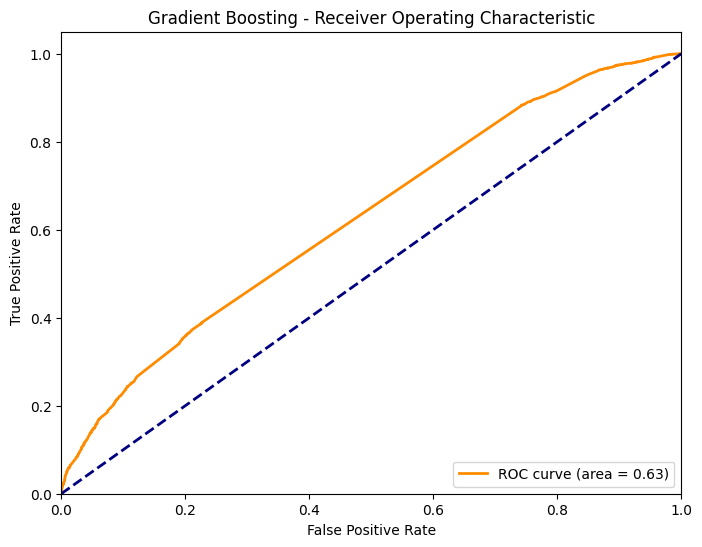

Naive Bayes Classifier:
  Accuracy: 66.90%
  Precision: 67.00%
  Recall: 66.90%
  F1 Score: 66.89%
  Confusion Matrix:
[[4434 1937]
 [2347 4226]]
  ROC AUC: 0.6990766653525671



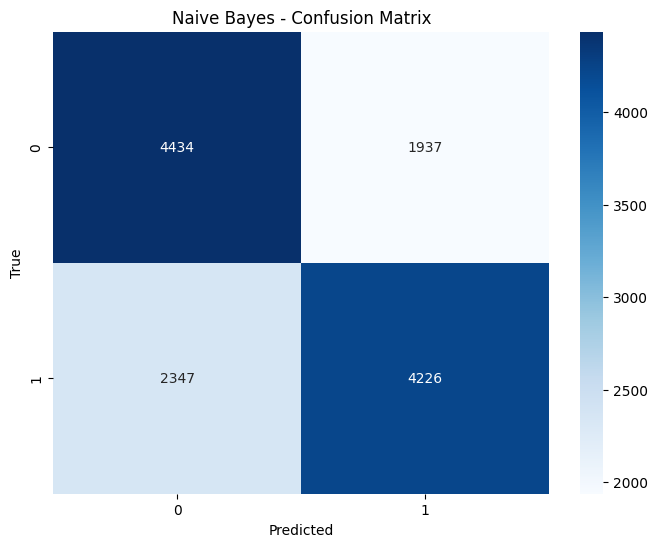

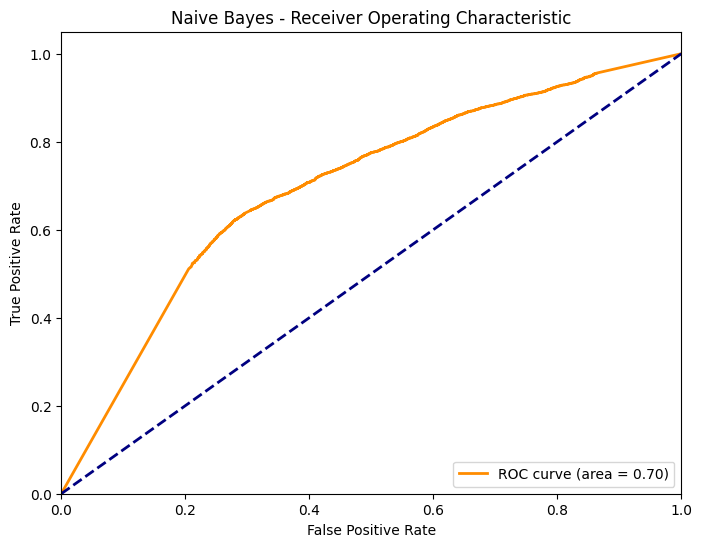

In [28]:
# Ejecutar clasificadores uno por uno
for name, clf in classifiers.items():
    train_and_evaluate(clf, name)

In [29]:
import numpy as np

# Función para preprocesar una oración
def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)
    tokens = [word.lower() for word in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Función para predecir una oración usando un clasificador entrenado
def predict_sentence(clf, sentence, vectorizer, scaler):
    processed_sentence = preprocess_sentence(sentence)
    sentence_vectorized = vectorizer.transform([processed_sentence])
    sentence_scaled = scaler.transform(sentence_vectorized)
    prediction = clf.predict(sentence_scaled)
    prediction_proba = clf.predict_proba(sentence_scaled) if hasattr(clf, "predict_proba") else None
    return prediction[0], prediction_proba

In [30]:
def test_sentence_with_classifiers(sentence, classifiers, vectorizer, scaler):
    for name, clf in classifiers.items():
        pred_label, pred_proba = predict_sentence(clf, sentence, vectorizer, scaler)
        print(f"{name} Classifier:")
        print(f"  Predicted label: {pred_label}")
        if pred_proba is not None:
            print(f"  Prediction probabilities: {pred_proba[0]}")
        print()

In [32]:
# Ejemplo de oración
sentence = "This is an example sentence to classify."

# Entrenar los clasificadores
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

# Prueba la oración con todos los clasificadores
test_sentence_with_classifiers(sentence, classifiers, vectorizer, scaler)

Logistic Regression Classifier:
  Predicted label: neg
  Prediction probabilities: [0.5367573 0.4632427]

KNN Classifier:
  Predicted label: pos
  Prediction probabilities: [0.2 0.8]

Random Forest Classifier:
  Predicted label: neg
  Prediction probabilities: [0.90223625 0.09776375]

Gradient Boosting Classifier:
  Predicted label: pos
  Prediction probabilities: [0.49395532 0.50604468]

Naive Bayes Classifier:
  Predicted label: pos
  Prediction probabilities: [1.62431436e-34 1.00000000e+00]



In [34]:
sentence2 = "This is the best movie i ever seen in my entire life"
print(sentence2)
test_sentence_with_classifiers(sentence2, classifiers, vectorizer, scaler)

sentence3 = "This is a bad movie, no one has to see this trash"
print(sentence3)
test_sentence_with_classifiers(sentence3, classifiers, vectorizer, scaler)

This is the best movie i ever seen in my entire life
Logistic Regression Classifier:
  Predicted label: pos
  Prediction probabilities: [0.33906382 0.66093618]

KNN Classifier:
  Predicted label: neg
  Prediction probabilities: [1. 0.]

Random Forest Classifier:
  Predicted label: pos
  Prediction probabilities: [0.32 0.68]

Gradient Boosting Classifier:
  Predicted label: pos
  Prediction probabilities: [0.38441038 0.61558962]

Naive Bayes Classifier:
  Predicted label: pos
  Prediction probabilities: [4.96343427e-04 9.99503657e-01]

This is a bad movie, no one has to see this trash
Logistic Regression Classifier:
  Predicted label: neg
  Prediction probabilities: [9.99042153e-01 9.57847419e-04]

KNN Classifier:
  Predicted label: neg
  Prediction probabilities: [0.6 0.4]

Random Forest Classifier:
  Predicted label: neg
  Prediction probabilities: [0.8 0.2]

Gradient Boosting Classifier:
  Predicted label: neg
  Prediction probabilities: [0.6925681 0.3074319]

Naive Bayes Classifier: